# Python Examples for STM32F4 Discovery

In [ ]:
import ctypes
import sys

[STM32F4XX_StdPeriph_Lib.py](remcu_include/STM32F4XX_StdPeriph_Lib.py) is a Python wrapper that containing all necessary constants and structures
which makes it possible to use the Standard Peripheral Library function
just like with C and C++ code.

In [ ]:
from remcu_include.STM32F4XX_StdPeriph_Lib import *

Loading the REMCU library

In [ ]:
if sys.platform.startswith('win32'): #Windows
    remcu = ctypes.WinDLL("remcu.dll")
elif sys.platform.startswith('cygwin'): #Windows/Cygwin
    remcu = ctypes.WinDLL("remcu.dll")
elif sys.platform.startswith('linux'):  #Linux OS
    remcu = ctypes.CDLL("./libremcu.so")
elif sys.platform.startswith('darwin'): #MacOS
    remcu = ctypes.CDLL("./libremcu.dylib")

Connecting to a debug server.
The [REMCU](https://remotemcu.com/) library is able to work with [OpenOCD](https://github.com/ilg-archived/openocd/releases/tag/v0.10.0-12-20190422) or [GDB server](https://atollic.com/resources/download/).
There is using the [remcu_connect2OpenOCD](https://remotemcu.com/api-v1-0#remcu_getVersion) function for connecting to the OpenOcd server. 
The functions have the same set of parameters. The first parameter is an IP address of the debug server.
The second one is a port of the debug server. For instance, OpenOCD server print the port in log messages.
The third parameter is a connection timeout.
Upon a successful connection, the function returns the “true” value, otherwise, it returns “false”.
> Detailed description of other REMCU function you see in [“remcu.h”](remcu_include/remcu.h) or [API reference](https://remotemcu.com/api-v1-0)

Before that, plug STM32F4 Discovery board to PC and run openocd utility in command line:  
```bash
openocd.exe -f board/stm32f4discovery.cfg
```
Result:
![Image](img/openocd.png)


In [ ]:
debug_server_ip = "127.0.0.1"
default_openocd_port = 6666
default_gdb_port = 3333 # if you use remcu_connect2GDB function
timeout_sec = 3 # It can not be negative

success = remcu.remcu_connect2OpenOCD(debug_server_ip, default_openocd_port, timeout_sec)
if success == 0:
    print("Server error. Possible solutions: ")
    print("1. Check connection to debug server")
    print("2. Check debug server running")
    print("3. Run the script using Python2")
    exit()

If you use GDB server (either OpenOCD or ST-Link GDB server or Jlink GDB server etc.), you uncomment code below and run it:
<details>
  <summary> Jlink windows. Where the port is written <b> (click here)</b></summary>
 
<img src="https://raw.githubusercontent.com/remotemcu/remcu_examples/master/wiki/img/jlink.png" >
<img src="https://raw.githubusercontent.com/remotemcu/remcu_examples/master/wiki/img/jlink2.png" >
</details>  
<details>
  <summary> ST link GDB windows. Where the port is written<b> (click here)</b></summary>

<img src="https://raw.githubusercontent.com/remotemcu/remcu_examples/master/wiki/img/run-stling-gdb.png">
</details>

In [ ]:
#default_openocd_gdb_port = 3333
#default_jlink_port = 2331
#default_stlink_port = 61234
#custom_port = ...
#remcu.remcu_connect2GDB(debug_server_ip, default_openocd_gdb_port /*default_jlink_port*/ /*default_stlink_port*/, timeout_sec)

If connection were failed and the function returned false. See [Issue](https://github.com/remotemcu/remcu_examples/issues) and [Troubleshooting Page](https://remotemcu.com/troubleshooting-page) 

If connection were success... Jupyter Output:
![Image](img/success_connection.png)

Reset the MCU (see [“remcu.h”](remcu_include/remcu.h) or [API reference](https://remotemcu.com/api-v1-0)):

In [ ]:
remcu.remcu_resetRemoteUnit(1)

At this stage the microcontroller clock setting is already configured, 
       this is done through SystemInit() function which is called from startup
       file (startup_stm32f4xx.s) before to branch to application main.
       To see the default setting of SystemInit() function, refer to
       remcu_include/system_stm32f4xx.c file

In [ ]:
remcu.SystemInit();

### GPIO Example
![Image](img/gpio.png)
>The code below have been taken from **IO_Toggle** ([main.c](../STM32F4-Discovery_FW_V1.1.0/Project/Peripheral_Examples/IO_Toggle/main.c)) example of [Standard Peripheral Library(SPL) for STM32F4DISCOVERY](https://www.st.com/content/st_com/en/products/embedded-software/mcu-mpu-embedded-software/stm32-embedded-software/stm32-standard-peripheral-library-expansion/stsw-stm32068.html#overview)

GPIOD Periph clock enable:

In [ ]:
remcu.RCC_AHB1PeriphClockCmd(RCC_AHB1Periph_GPIOD, ENABLE);

Configure PD12, PD13, PD14 and PD15 in output pushpull mode:

In [ ]:
GPIO_InitStructure = GPIO_InitTypeDef()
GPIO_InitStructure.GPIO_Pin = GPIO_Pin_12 | GPIO_Pin_13 | GPIO_Pin_14| GPIO_Pin_15
GPIO_InitStructure.GPIO_Mode = GPIO_Mode_OUT
GPIO_InitStructure.GPIO_OType = GPIO_OType_PP
GPIO_InitStructure.GPIO_Speed = GPIO_Speed_100MHz
GPIO_InitStructure.GPIO_PuPd = GPIO_PuPd_NOPULL
remcu.GPIO_Init(GPIOD, GPIO_InitStructure.ref());

Flash LEDs on:

In [ ]:
remcu.GPIO_SetBits(GPIOD, GPIO_Pin_12) #/* PD12 to be toggled */
remcu.GPIO_SetBits(GPIOD, GPIO_Pin_13) #/* PD13 to be toggled */
remcu.GPIO_SetBits(GPIOD, GPIO_Pin_14) #/* PD14 to be toggled */
remcu.GPIO_SetBits(GPIOD, GPIO_Pin_15); #/* PD15 to be toggled */

<details>
  <summary><b>Result(click to show)</b></summary>

![Image](img/led_on.png)
</details>

Flash LEDs off:

In [ ]:
remcu.GPIO_ResetBits(GPIOD, GPIO_Pin_12|GPIO_Pin_13|GPIO_Pin_14|GPIO_Pin_15);

If it didn’t happen, you can use the utility functions to detect errors...

### Utility Functions

The ***remcu_getErrorCount***(see [“remcu.h”](remcu_include/remcu.h) or [API reference](https://remotemcu.com/api-v1-0)) function returns the number of errors that occurred after connection.

In [ ]:
remcu.remcu_getErrorCount()

If no error occurred, result **0**, otherwise see [Issue](https://github.com/remotemcu/remcu_examples/issues) and [Troubleshooting Page](https://remotemcu.com/troubleshooting-page)

The ***remcu_isConnected***(see [“remcu.h”](remcu_include/remcu.h) or [API reference](https://remotemcu.com/api-v1-0)) function indicates status of the current debug server connection.

In [ ]:
remcu.remcu_isConnected()

Result: connected ***1*** , disconnected ***0***

Some of debug adapters can have hardware problems. The ***remcu_debuggerTest***(see [“remcu.h”](remcu_include/remcu.h) or [API reference](https://remotemcu.com/api-v1-0)) function enables to detect such adapters. The function returns a null pointer if the test is successful.

In [ ]:
remcu.remcu_debuggerTest()

If no error occurred, result **0**, otherwise see [Issue](https://github.com/remotemcu/remcu_examples/issues) and [Troubleshooting Page](https://remotemcu.com/troubleshooting-page)

>If bugs are not discovered and the chip don't responds to driver function call or the result of work was not what you expected, see [Issue](https://github.com/remotemcu/remcu_examples/issues) and [Troubleshooting Page](https://remotemcu.com/troubleshooting-page)

### PWM EXAMPLE
![Image](img/pwm_wave.png)
This example shows how to configure the TIM peripheral in PWM (Pulse Width Modulation) 
mode.
>The code below have been based on **TIM_PWM_Output** ([main.c](../STM32F4-Discovery_FW_V1.1.0/Project/Peripheral_Examples/TIM_PWM_Output/main.c)) example of [Standard Peripheral Library(SPL) for STM32F4DISCOVERY](https://www.st.com/content/st_com/en/products/embedded-software/mcu-mpu-embedded-software/stm32-embedded-software/stm32-standard-peripheral-library-expansion/stsw-stm32068.html#overview)

GPIOD Configuration: TIM4 CH1 (PD12) and TIM4 CH2 (PD13) :

In [ ]:
GPIO_InitStructure.GPIO_Pin = GPIO_Pin_12 | GPIO_Pin_13
GPIO_InitStructure.GPIO_Mode = GPIO_Mode_AF
GPIO_InitStructure.GPIO_Speed = GPIO_Speed_100MHz
GPIO_InitStructure.GPIO_OType = GPIO_OType_PP
GPIO_InitStructure.GPIO_PuPd = GPIO_PuPd_UP
remcu.GPIO_Init(GPIOD, GPIO_InitStructure.ref())

#/* Connect TIM4 pins to AF2 */  
remcu.GPIO_PinAFConfig(GPIOD, GPIO_PinSource12, GPIO_AF_TIM4)
remcu.GPIO_PinAFConfig(GPIOD, GPIO_PinSource13, GPIO_AF_TIM4);

 TIM4 Configuration: generate 2 PWM signals with 2 different duty cycles.
 
    In this example TIM4 input clock (TIM4CLK) is set to 1/0xFFFF * APB1 clock (PCLK1), 
    since APB1 prescaler is different from 1.   
      TIM4CLK = PCLK1 / 0xFFFF
      PCLK1 = HCLK / 4 
      => TIM4CLK = HCLK / 2 = SystemCoreClock /2
    Note: 
     SystemCoreClock variable holds HCLK frequency and is defined in system_stm32f4xx.c file.
     Each time the core clock (HCLK) changes, user had to call SystemCoreClockUpdate()
     function to update SystemCoreClock variable value. Otherwise, any configuration
     based on this variable will be incorrect.  
     
    The TIM4 CCR1 register value is equal to 0xFFFF/2, so the TIM4 Channel 1 generates a 
    PWM signal with a frequency equal to ~1 KHz and a duty cycle equal to 50%:
    TIM4 Channel1 duty cycle = (TIM4_CCR1/ TIM4_ARR + 1)* 100 = 50%

    The TIM4 CCR2 register value is equal to 0xFFFF/4, so the TIM4 Channel 2 generates a 
    PWM signal with a frequency equal to ~1 KHz and a duty cycle equal to 25%:
    TIM4 Channel2 duty cycle = (TIM4_CCR2/ TIM4_ARR + 1)* 100 = 25%
    
    The PWM waveform can be displayed using an oscilloscope.
    
    @par Hardware and Software environment 

  - This example runs on STM32F4xx Devices Revision A.
  
  - This example has been tested with STM32F4-Discovery (MB997) RevA and can be
    easily tailored to any other development board.    

TIM4 Periph clock enable:

In [ ]:
remcu.RCC_APB1PeriphClockCmd(RCC_APB1Periph_TIM4, ENABLE);

Time base configuration:

In [ ]:
TIM_TimeBaseStructure = TIM_TimeBaseInitTypeDef()
TIM_OCInitStructure = TIM_OCInitTypeDef()
TIM_TimeBaseStructure.TIM_Period = 0xFFFF
TIM_TimeBaseStructure.TIM_Prescaler = 0xFFFF # TIM4CLK = PCLK1 / 0xFFFF
TIM_TimeBaseStructure.TIM_ClockDivision = 0xFFFF
TIM_TimeBaseStructure.TIM_CounterMode = TIM_CounterMode_Up

remcu.TIM_TimeBaseInit(TIM4, TIM_TimeBaseStructure.ref());

PWM1 Mode configuration for Channel1

    The TIM4 CCR1 register value is equal to 0xFFFF/2, so the TIM4 Channel 1 generates a 
    PWM signal with a frequency equal to ~1 KHz and a duty cycle equal to 50%:
    TIM4 Channel1 duty cycle = (TIM4_CCR1/ TIM4_ARR + 1)* 100 = 50%

In [ ]:
TIM_OCInitStructure.TIM_OCMode = TIM_OCMode_PWM1
TIM_OCInitStructure.TIM_OutputState = TIM_OutputState_Enable
TIM_OCInitStructure.TIM_Pulse = 0xFFFF/2
TIM_OCInitStructure.TIM_OCPolarity = TIM_OCPolarity_High

remcu.TIM_OC1Init(TIM4, TIM_OCInitStructure.ref());

PWM1 Mode configuration for Channel2

    The TIM4 CCR2 register value is equal to 0xFFFF/4, so the TIM4 Channel 2 generates a 
    PWM signal with a frequency equal to ~1 KHz and a duty cycle equal to 25%:
    TIM4 Channel2 duty cycle = (TIM4_CCR2/ TIM4_ARR + 1)* 100 = 25%

In [ ]:
TIM_OCInitStructure.TIM_Pulse = 0xFFFF/4

remcu.TIM_OC2Init(TIM4, TIM_OCInitStructure.ref());

TIM4 enable counter:

In [ ]:
remcu.TIM_Cmd(TIM4, ENABLE);

Now you can control the duty cycle and adjust the brightness of the board LEDs.

Change the second argument of TIM_SetCompare(1,2) function:

In [20]:
remcu.TIM_SetCompare1(TIM4, 0) #Set Duty Cycle of TIM4 channel 1
remcu.TIM_SetCompare2(TIM4, 0); #Set Duty Cycle of TIM4 channel 2

Create two sliders widget to control brightness of on-board LEDS
>First install [ipywidgets](https://github.com/jupyter-widgets/ipywidgets) or make sure you have it

In [ ]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [ ]:
@interact
def SetBrightness(brightness_green=(0,0xFFFF), brightness_red=(0,0xFFFF)):
    remcu.TIM_SetCompare1(TIM4, brightness_green) #Set Duty Cycle of TIM4 channel 1
    remcu.TIM_SetCompare2(TIM4, brightness_red);  #Set Duty Cycle of TIM4 channel 2

<details>
  <summary>Result<b>(click to show)</b></summary>

![Image](img/slider_f4d.gif)
</details>

### ADC example

![adc_head](img/adc_head.png )

>The code below have been taken from **ADC3_DMA** ([main.c](../STM32F4-Discovery_FW_V1.1.0/Project/Peripheral_Examples/ADC3_DMA/main.c)) example of [Standard Peripheral Library(SPL) for STM32F4DISCOVERY](https://www.st.com/content/st_com/en/products/embedded-software/mcu-mpu-embedded-software/stm32-embedded-software/stm32-standard-peripheral-library-expansion/stsw-stm32068.html#overview).
DMA code was dropped.

In this example, the system clock is 144MHz, APB2 = 72MHz and ADC clock = APB2/2. 
Since ADC3 clock is 36 MHz and sampling time is set to 3 cycles, the conversion 
time to 12bit data is 12 cycles so the total conversion time is (12+3)/36= 0.41us(2.4Msps).

@par Hardware and Software environment 

  - This example runs on STM32F4xx Devices Revision A.
  
  - This example has been tested with STM32F4-Discovery (MB997) RevA and can be
    easily tailored to any other development board.
    
  - STM32F4-Discovery 
    - Connect the external signal(ranges from 0 to 3.3V) to the ADC3 pin (PC.02) to be converted.

ADC3 configuration:

In [ ]:
ADC_InitStructure = ADC_InitTypeDef()
ADC_CommonInitStructure = ADC_CommonInitTypeDef()

remcu.RCC_AHB1PeriphClockCmd(RCC_AHB1Periph_DMA2 | RCC_AHB1Periph_GPIOC, ENABLE);
remcu.RCC_APB2PeriphClockCmd(RCC_APB2Periph_ADC3, ENABLE);

#/* Configure ADC3 Channel12 pin as analog input ******************************/
GPIO_InitStructure.GPIO_Pin = GPIO_Pin_2;
GPIO_InitStructure.GPIO_Mode = GPIO_Mode_AN;
GPIO_InitStructure.GPIO_PuPd = GPIO_PuPd_NOPULL ;
remcu.GPIO_Init(GPIOC, GPIO_InitStructure.ref());

#/* ADC Common Init **********************************************************/
ADC_CommonInitStructure.ADC_Mode = ADC_Mode_Independent;
ADC_CommonInitStructure.ADC_Prescaler = ADC_Prescaler_Div2;
ADC_CommonInitStructure.ADC_DMAAccessMode = ADC_DMAAccessMode_Disabled;
ADC_CommonInitStructure.ADC_TwoSamplingDelay = ADC_TwoSamplingDelay_5Cycles;
remcu.ADC_CommonInit(ADC_CommonInitStructure.ref());

#/* ADC3 Init ****************************************************************/
ADC_InitStructure.ADC_Resolution = ADC_Resolution_12b;
ADC_InitStructure.ADC_ScanConvMode = DISABLE;
ADC_InitStructure.ADC_ContinuousConvMode = ENABLE;
ADC_InitStructure.ADC_ExternalTrigConvEdge = ADC_ExternalTrigConvEdge_None;
ADC_InitStructure.ADC_DataAlign = ADC_DataAlign_Right;
ADC_InitStructure.ADC_NbrOfConversion = 1;
remcu.ADC_Init(ADC3, ADC_InitStructure.ref());

#/* ADC3 regular channel12 configuration *************************************/
remcu.ADC_RegularChannelConfig(ADC3, ADC_Channel_12, 1, ADC_SampleTime_3Cycles);

#/* Enable ADC3 */
remcu.ADC_Cmd(ADC3, ENABLE);

Function for reading ADC value:

In [ ]:
def ADC_value():
    remcu.ADC_SoftwareStartConv(ADC3);
    return remcu.ADC_GetConversionValue(ADC3)

ADC_value()

Plug a potentiometer into the ***PC2*** pin and run the code below. Rotate the shaft and you will get the voltage versus time chart:
<details>
  <summary>Scheme <b>(click to show)</b></summary>

![Image](img/var_resistor_scheme.png)
</details>

>First install [matplotlib](https://github.com/matplotlib/jupyter-matplotlib) or make sure you have it

Result: 


<IPython.core.display.Javascript object>


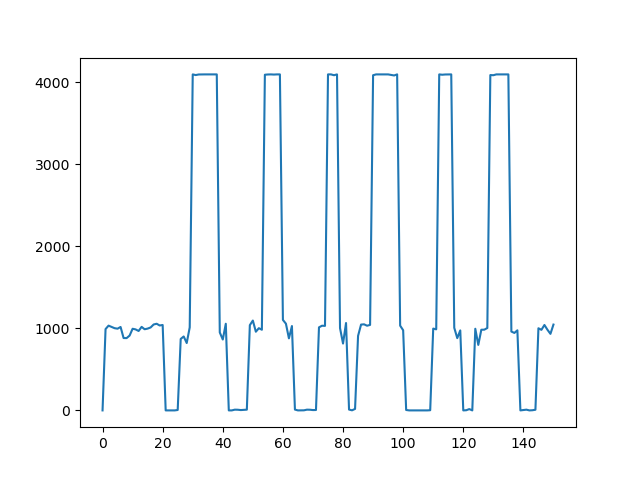

In [34]:
%matplotlib notebook
import matplotlib.pyplot as plt

print("Result: ")

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

ADC = [0]
for i in range(0,150):
    ADC.append(ADC_value())
    ax.clear()
    ax.plot(ADC)
    fig.canvas.draw()

<details>
  <summary>Result<b>(click to show)</b></summary>

![Image](img/f4_adc.gif)
</details>

Finalizing work with REMCU Library:

In [ ]:
remcu.remcu_disconnect()

### Extra Utility Function

The ***ReMCU_getVersion***(see [“remcu.h”](remcu_include/remcu.h) or [API reference](https://remotemcu.com/api-v1-0)) function returns a pointer to a char array containing information about the REMCU lib versions

In [ ]:
print(ctypes.c_char_p(remcu.remcu_getVersion()).value)